In [1]:
import pandas as pd
import numpy as np
import datetime
import pickle
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score  # 批量导入指标算法
from sklearn.model_selection import train_test_split
import seaborn as sns
from pyecharts.globals import CurrentConfig, NotebookType
from pyecharts import options as opts
from pyecharts.charts import Scatter
from pyecharts.commons.utils import JsCode
from sklearn.linear_model import BayesianRidge, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from convert_to_num import ConvertToNum

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

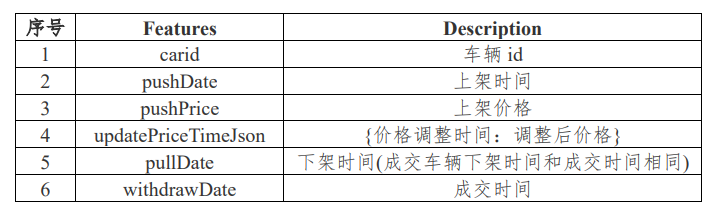

In [2]:
# 变量缩写替换字典
my_dict = {'carid':'Carid','tradeTime':'trt', 'tradeTime_from_now':'tr_f_n', 'tradeTime_q':'trt_q', 'cityId': 'cid', 'transferCount':'transferCount', 'seatings':'seatings', 'registerDate':'rdate','registerDate_from_now':'rdate_f_n','registerDate_q':'rdate_q','licenseDate':'ldate', 'licenseDate_from_now':'ldate_f_n', 'licenseDate_q':'ldate_q', 'anonymousFeature1':'ayf1', 'anonymousFeature2':'ayf2', 'anonymousFeature3':'ayf3', 'anonymousFeature4':'ayf4', 'anonymousFeature5':'ayf5', 'anonymousFeature6':'ayf6', 'anonymousFeature7':'ayf7', 'anonymousFeature8':'ayf8', 'anonymousFeature9':'ayf9', 'anonymousFeature10':'ayf10', 'anonymousFeature11':'ayf11', 'anonymousFeature12':'ayf12', 'anonymousFeature13':'ayf13', 'anonymousFeature14':'ayf14', 'anonymousFeature15':'ayf15','anonymousFeature7_from_now':'ayf7_f_n', 'anonymousFeature7_q':'ayf7_q', 'anonymousFeature13_m':'ayf13_m', 'updatePriceTimeJson':'udpt_json', 'updatePriceCount':'udpc', 'updatePricePeriod':'udpp', 'updatePricePeriodFirst':'udppf', 'updatePriceRange':'udpr', 'updatePriceVariance':'udpv'}

# 读取数据

In [3]:
df1 = pickle.load(open('./data/df1.pkl', 'rb'))
df1

,index,carid,tradeTime,brand,serial,model,mileage,color,cityId,carCode,...,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,anonymousFeature7_from_now,anonymousFeature15_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature7_q,anonymousFeature13_m
0,0,1,2021-06-28,1,1,1,4.01,1,1,1.0,...,206.0,1511.0,1455.0,NaN,NaN,2,4,1,4.0,9.0
1,1,2,2021-06-25,2,2,2,8.60,1,2,1.0,...,209.0,1876.0,1766.0,NaN,NaN,2,4,1,4.0,9.0
2,2,5,2021-06-19,5,5,5,15.56,1,2,3.0,...,215.0,5102.0,5076.0,NaN,NaN,2,1,1,1.0,8.0
3,3,6,2021-06-29,6,6,6,6.04,1,3,1.0,...,205.0,1998.0,1959.0,1251.0,NaN,2,3,3,3.0,8.0
4,4,7,2021-06-30,7,7,7,5.70,4,1,2.0,...,204.0,3459.0,3432.0,487.0,NaN,2,3,3,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,18531,2021-05-26,34,588,4169,10.38,5,35,3.0,...,239.0,5467.0,5415.0,NaN,NaN,2,1,1,1.0,2.0
29996,29996,4294,2020-06-03,12,92,1797,11.69,2,1,2.0,...,596.0,3612.0,3543.0,850.0,NaN,2,1,2,3.0,1.0
29997,29997,20584,2020-09-27,7,113,501,9.87,6,1,2.0,...,480.0,3703.0,3639.0,NaN,NaN,3,4,1,1.0,4.0
29998,29998,11490,2020-11-09,45,131,3024,9.57,1,1,1.0,...,437.0,2120.0,2074.0,560.0,NaN,4,2,2,3.0,8.0


In [4]:
df4 = pd.read_table('../附件/附件4：门店交易训练数据.txt', header=None, sep='\t')
df4.columns=['carid', 'pushDate', 'pushPrice', 'updatePriceTimeJson', 'pullDate', 'withdrawDate']
df4.replace("nan",np.nan,inplace=True)
df4

,carid,pushDate,pushPrice,updatePriceTimeJson,pullDate,withdrawDate
0,68603,2021-03-11,3.9800,{},2021-03-11,2021-03-11
1,12312,2021-05-14,4.5000,{},2021-06-14,2021-06-14
2,57655,2021-03-13,23.9000,"{""2021-04-05"": ""23""}",2021-04-08,2021-04-08
3,45688,2020-09-01,20.5798,{},2020-09-04,2020-09-04
4,52081,2021-04-29,12.2800,"{""2021-05-20"": ""11.9""}",2021-06-21,2021-06-21
...,...,...,...,...,...,...
9995,10177,2021-07-31,22.8800,{},2021-09-11,NaN
9996,54312,2021-03-22,12.3000,{},2021-04-16,NaN
9997,45597,2021-01-09,15.3800,{},2021-01-27,NaN
9998,38629,2021-06-07,36.8800,"{""2021-06-12"": ""36.6""}",2021-06-22,NaN


# 将updatePriceTimeJson转换为字典

In [5]:
# 将updatePriceTimeJson转换为字典
df4['updatePriceTimeJson'] = df4['updatePriceTimeJson'].apply(eval)
df4

,carid,pushDate,pushPrice,updatePriceTimeJson,pullDate,withdrawDate
0,68603,2021-03-11,3.9800,{},2021-03-11,2021-03-11
1,12312,2021-05-14,4.5000,{},2021-06-14,2021-06-14
2,57655,2021-03-13,23.9000,{'2021-04-05': '23'},2021-04-08,2021-04-08
3,45688,2020-09-01,20.5798,{},2020-09-04,2020-09-04
4,52081,2021-04-29,12.2800,{'2021-05-20': '11.9'},2021-06-21,2021-06-21
...,...,...,...,...,...,...
9995,10177,2021-07-31,22.8800,{},2021-09-11,NaN
9996,54312,2021-03-22,12.3000,{},2021-04-16,NaN
9997,45597,2021-01-09,15.3800,{},2021-01-27,NaN
9998,38629,2021-06-07,36.8800,{'2021-06-12': '36.6'},2021-06-22,NaN


# 将上架价格加入调价字典

In [6]:
# 将上架价格加入调价字典
def func(line):
    d = {}
    d[line['pushDate']] = line['pushPrice']
    line['updatePriceTimeJson'].update(d)
    return line
df4 = df4.apply(func, axis=1)
df4

,carid,pushDate,pushPrice,updatePriceTimeJson,pullDate,withdrawDate
0,68603,2021-03-11,3.9800,{'2021-03-11': 3.98},2021-03-11,2021-03-11
1,12312,2021-05-14,4.5000,{'2021-05-14': 4.5},2021-06-14,2021-06-14
2,57655,2021-03-13,23.9000,"{'2021-04-05': '23', '2021-03-13': 23.9}",2021-04-08,2021-04-08
3,45688,2020-09-01,20.5798,{'2020-09-01': 20.5798},2020-09-04,2020-09-04
4,52081,2021-04-29,12.2800,"{'2021-05-20': '11.9', '2021-04-29': 12.28}",2021-06-21,2021-06-21
...,...,...,...,...,...,...
9995,10177,2021-07-31,22.8800,{'2021-07-31': 22.88},2021-09-11,NaN
9996,54312,2021-03-22,12.3000,{'2021-03-22': 12.3},2021-04-16,NaN
9997,45597,2021-01-09,15.3800,{'2021-01-09': 15.38},2021-01-27,NaN
9998,38629,2021-06-07,36.8800,"{'2021-06-12': '36.6', '2021-06-07': 36.88}",2021-06-22,NaN


# 构造一些新的变量

In [7]:
# 构造一些新的变量  调价波动方差，调价幅度（原价与最低价），第一次调价间隔, 调价周期（平均多久调一次），调价次数
def func1(item):
    key_ls = [pd.to_datetime(i) for i in item.keys()]
    key_ls.sort()
    key_ls1 = np.array(key_ls[:-1])
    key_ls2 = np.array(key_ls[1:])
    v = np.array(list(map(lambda x: abs((x[0]-x[1])/datetime.timedelta(1)), zip(key_ls1, key_ls2)))).mean()
    return v
def func2(item):
    key_ls = [pd.to_datetime(i) for i in item.keys()]
    key_ls.sort()
    if len(key_ls)>=2:
        key_ls1 = np.array(key_ls[0:1])
        key_ls2 = np.array(key_ls[1:2])
        v = np.array(list(map(lambda x: abs((x[0]-x[1])/datetime.timedelta(1)), zip(key_ls1, key_ls2)))).mean()
        return v
    return
def func3(item):
    key_ls = [float(i) for i in item.values()]
    key_ls.sort()
    top = key_ls[-1]
    bottom = key_ls[0]
    return abs(top-bottom)
def func4(item):
    val_ls = [float(i) for i in item.values()]
    val_ls.sort()
    val_ls = np.array(val_ls)
    return np.square(val_ls-np.mean(val_ls)).sum()/len(val_ls)
df4['updatePriceCount'] = df4['updatePriceTimeJson'].apply(len) - 1 # 调价次数
df4['updatePricePeriod'] = df4['updatePriceTimeJson'].apply(func1)  # 调价周期（平均多久调一次）
df4['updatePricePeriodFirst'] = df4['updatePriceTimeJson'].apply(func2)  # 第一次调价间隔
df4['updatePriceRange'] = df4['updatePriceTimeJson'].apply(func3)  # 调价幅度（原价与最低价）
df4['updatePriceVariance'] = df4['updatePriceTimeJson'].apply(func4)  # 调价波动均方
df4

D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys


,carid,pushDate,pushPrice,updatePriceTimeJson,pullDate,withdrawDate,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance
0,68603,2021-03-11,3.9800,{'2021-03-11': 3.98},2021-03-11,2021-03-11,0,NaN,NaN,0.00,0.0000
1,12312,2021-05-14,4.5000,{'2021-05-14': 4.5},2021-06-14,2021-06-14,0,NaN,NaN,0.00,0.0000
2,57655,2021-03-13,23.9000,"{'2021-04-05': '23', '2021-03-13': 23.9}",2021-04-08,2021-04-08,1,23.0,23.0,0.90,0.2025
3,45688,2020-09-01,20.5798,{'2020-09-01': 20.5798},2020-09-04,2020-09-04,0,NaN,NaN,0.00,0.0000
4,52081,2021-04-29,12.2800,"{'2021-05-20': '11.9', '2021-04-29': 12.28}",2021-06-21,2021-06-21,1,21.0,21.0,0.38,0.0361
...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,2021-07-31,22.8800,{'2021-07-31': 22.88},2021-09-11,NaN,0,NaN,NaN,0.00,0.0000
9996,54312,2021-03-22,12.3000,{'2021-03-22': 12.3},2021-04-16,NaN,0,NaN,NaN,0.00,0.0000
9997,45597,2021-01-09,15.3800,{'2021-01-09': 15.38},2021-01-27,NaN,0,NaN,NaN,0.00,0.0000
9998,38629,2021-06-07,36.8800,"{'2021-06-12': '36.6', '2021-06-07': 36.88}",2021-06-22,NaN,1,5.0,5.0,0.28,0.0196


# 目标值构建
* 目标值构建：是否成交，is_withdraw；成交周期，withdrawPeriod

## 是否有成交

In [8]:
a = ~df4.withdrawDate.isna()
df4['is_withdraw'] = a.astype(int)
df4

,carid,pushDate,pushPrice,updatePriceTimeJson,pullDate,withdrawDate,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw
0,68603,2021-03-11,3.9800,{'2021-03-11': 3.98},2021-03-11,2021-03-11,0,NaN,NaN,0.00,0.0000,1
1,12312,2021-05-14,4.5000,{'2021-05-14': 4.5},2021-06-14,2021-06-14,0,NaN,NaN,0.00,0.0000,1
2,57655,2021-03-13,23.9000,"{'2021-04-05': '23', '2021-03-13': 23.9}",2021-04-08,2021-04-08,1,23.0,23.0,0.90,0.2025,1
3,45688,2020-09-01,20.5798,{'2020-09-01': 20.5798},2020-09-04,2020-09-04,0,NaN,NaN,0.00,0.0000,1
4,52081,2021-04-29,12.2800,"{'2021-05-20': '11.9', '2021-04-29': 12.28}",2021-06-21,2021-06-21,1,21.0,21.0,0.38,0.0361,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,2021-07-31,22.8800,{'2021-07-31': 22.88},2021-09-11,NaN,0,NaN,NaN,0.00,0.0000,0
9996,54312,2021-03-22,12.3000,{'2021-03-22': 12.3},2021-04-16,NaN,0,NaN,NaN,0.00,0.0000,0
9997,45597,2021-01-09,15.3800,{'2021-01-09': 15.38},2021-01-27,NaN,0,NaN,NaN,0.00,0.0000,0
9998,38629,2021-06-07,36.8800,"{'2021-06-12': '36.6', '2021-06-07': 36.88}",2021-06-22,NaN,1,5.0,5.0,0.28,0.0196,0


## 成交周期

In [9]:
# 数据类型转换
df4['pushDate'] = pd.to_datetime(df4['pushDate'])
df4['withdrawDate'] = pd.to_datetime(df4['withdrawDate'])
df4

,carid,pushDate,pushPrice,updatePriceTimeJson,pullDate,withdrawDate,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw
0,68603,2021-03-11,3.9800,{'2021-03-11': 3.98},2021-03-11,2021-03-11,0,NaN,NaN,0.00,0.0000,1
1,12312,2021-05-14,4.5000,{'2021-05-14': 4.5},2021-06-14,2021-06-14,0,NaN,NaN,0.00,0.0000,1
2,57655,2021-03-13,23.9000,"{'2021-04-05': '23', '2021-03-13': 23.9}",2021-04-08,2021-04-08,1,23.0,23.0,0.90,0.2025,1
3,45688,2020-09-01,20.5798,{'2020-09-01': 20.5798},2020-09-04,2020-09-04,0,NaN,NaN,0.00,0.0000,1
4,52081,2021-04-29,12.2800,"{'2021-05-20': '11.9', '2021-04-29': 12.28}",2021-06-21,2021-06-21,1,21.0,21.0,0.38,0.0361,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,2021-07-31,22.8800,{'2021-07-31': 22.88},2021-09-11,NaT,0,NaN,NaN,0.00,0.0000,0
9996,54312,2021-03-22,12.3000,{'2021-03-22': 12.3},2021-04-16,NaT,0,NaN,NaN,0.00,0.0000,0
9997,45597,2021-01-09,15.3800,{'2021-01-09': 15.38},2021-01-27,NaT,0,NaN,NaN,0.00,0.0000,0
9998,38629,2021-06-07,36.8800,"{'2021-06-12': '36.6', '2021-06-07': 36.88}",2021-06-22,NaT,1,5.0,5.0,0.28,0.0196,0


In [10]:
# 成交周期
df4['withdrawPeriod'] = (df4.withdrawDate - df4.pushDate)/datetime.timedelta(1)
df4

,carid,pushDate,pushPrice,updatePriceTimeJson,pullDate,withdrawDate,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw,withdrawPeriod
0,68603,2021-03-11,3.9800,{'2021-03-11': 3.98},2021-03-11,2021-03-11,0,NaN,NaN,0.00,0.0000,1,0.0
1,12312,2021-05-14,4.5000,{'2021-05-14': 4.5},2021-06-14,2021-06-14,0,NaN,NaN,0.00,0.0000,1,31.0
2,57655,2021-03-13,23.9000,"{'2021-04-05': '23', '2021-03-13': 23.9}",2021-04-08,2021-04-08,1,23.0,23.0,0.90,0.2025,1,26.0
3,45688,2020-09-01,20.5798,{'2020-09-01': 20.5798},2020-09-04,2020-09-04,0,NaN,NaN,0.00,0.0000,1,3.0
4,52081,2021-04-29,12.2800,"{'2021-05-20': '11.9', '2021-04-29': 12.28}",2021-06-21,2021-06-21,1,21.0,21.0,0.38,0.0361,1,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,2021-07-31,22.8800,{'2021-07-31': 22.88},2021-09-11,NaT,0,NaN,NaN,0.00,0.0000,0,NaN
9996,54312,2021-03-22,12.3000,{'2021-03-22': 12.3},2021-04-16,NaT,0,NaN,NaN,0.00,0.0000,0,NaN
9997,45597,2021-01-09,15.3800,{'2021-01-09': 15.38},2021-01-27,NaT,0,NaN,NaN,0.00,0.0000,0,NaN
9998,38629,2021-06-07,36.8800,"{'2021-06-12': '36.6', '2021-06-07': 36.88}",2021-06-22,NaT,1,5.0,5.0,0.28,0.0196,0,NaN


# 缺失值处理

In [11]:
# 查看缺失值
df4.isnull().any()

carid                     False
pushDate                  False
pushPrice                 False
updatePriceTimeJson       False
pullDate                  False
withdrawDate               True
updatePriceCount          False
updatePricePeriod          True
updatePricePeriodFirst     True
updatePriceRange          False
updatePriceVariance       False
is_withdraw               False
withdrawPeriod             True
dtype: bool

In [12]:
df4['updatePricePeriod'] = df4['updatePricePeriod'].fillna(0)
df4['updatePricePeriodFirst'] = df4['updatePricePeriodFirst'].fillna(0)

In [13]:
# 查看缺失值
df4.isnull().any()

carid                     False
pushDate                  False
pushPrice                 False
updatePriceTimeJson       False
pullDate                  False
withdrawDate               True
updatePriceCount          False
updatePricePeriod         False
updatePricePeriodFirst    False
updatePriceRange          False
updatePriceVariance       False
is_withdraw               False
withdrawPeriod             True
dtype: bool

In [14]:
# 有成交周期的是否存在缺失值
df4.loc[df4['is_withdraw']==1].isnull().any()

carid                     False
pushDate                  False
pushPrice                 False
updatePriceTimeJson       False
pullDate                  False
withdrawDate              False
updatePriceCount          False
updatePricePeriod         False
updatePricePeriodFirst    False
updatePriceRange          False
updatePriceVariance       False
is_withdraw               False
withdrawPeriod            False
dtype: bool

# 相关性分析

,carid,pushPrice,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw,withdrawPeriod
carid,1.000000,0.025597,0.019939,0.016113,0.017195,0.010846,0.006539,NaN,0.021348
pushPrice,0.025597,1.000000,0.043065,0.032441,0.029585,0.128585,0.058016,NaN,0.069369
updatePriceCount,0.019939,0.043065,1.000000,0.418337,0.385522,0.299921,0.046373,NaN,0.230906
updatePricePeriod,0.016113,0.032441,0.418337,1.000000,0.957760,0.160012,0.006275,NaN,0.426749
updatePricePeriodFirst,0.017195,0.029585,0.385522,0.957760,1.000000,0.142928,0.002557,NaN,0.400617
updatePriceRange,0.010846,0.128585,0.299921,0.160012,0.142928,1.000000,0.874427,NaN,0.073705
updatePriceVariance,0.006539,0.058016,0.046373,0.006275,0.002557,0.874427,1.000000,NaN,0.001143
is_withdraw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
withdrawPeriod,0.021348,0.069369,0.230906,0.426749,0.400617,0.073705,0.001143,NaN,1.000000


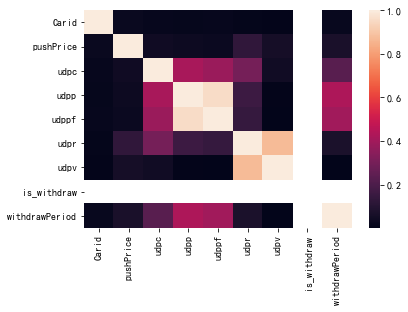

In [15]:
# 相关性矩阵
corr = df4.loc[df4['is_withdraw']==1].corr()
sns.heatmap(corr, 
            xticklabels=[my_dict[i] if i in my_dict else i for i in corr.columns.values],
            yticklabels=[my_dict[i] if i in my_dict else i for i in corr.columns.values])

corr

In [16]:
corr.withdrawPeriod

carid                     0.021348
pushPrice                 0.069369
updatePriceCount          0.230906
updatePricePeriod         0.426749
updatePricePeriodFirst    0.400617
updatePriceRange          0.073705
updatePriceVariance       0.001143
is_withdraw                    NaN
withdrawPeriod            1.000000
Name: withdrawPeriod, dtype: float64

# 预测准备工作

## 特征值

In [17]:
# 数据表拼接，附加1数据和附件4数据
df4['carid'] = df4['carid'].astype(str)
df = df4.merge(right=df1,how='left', on='carid')

In [18]:
df

,carid,pushDate,pushPrice,updatePriceTimeJson,pullDate,withdrawDate,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,...,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,anonymousFeature7_from_now,anonymousFeature15_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature7_q,anonymousFeature13_m
0,68603,2021-03-11,3.9800,{'2021-03-11': 3.98},2021-03-11,2021-03-11,0,0.0,0.0,0.00,...,315.0,3033.0,2995.0,1413.0,NaN,1,4,4,1.0,11.0
1,12312,2021-05-14,4.5000,{'2021-05-14': 4.5},2021-06-14,2021-06-14,0,0.0,0.0,0.00,...,251.0,1602.0,1528.0,NaN,NaN,2,3,4,4.0,9.0
2,57655,2021-03-13,23.9000,"{'2021-04-05': '23', '2021-03-13': 23.9}",2021-04-08,2021-04-08,1,23.0,23.0,0.90,...,290.0,995.0,804.0,313.0,NaN,2,2,4,1.0,1.0
3,45688,2020-09-01,20.5798,{'2020-09-01': 20.5798},2020-09-04,2020-09-04,0,0.0,0.0,0.00,...,506.0,4159.0,4070.0,NaN,-588.0,3,3,4,1.0,2.0
4,52081,2021-04-29,12.2800,"{'2021-05-20': '11.9', '2021-04-29': 12.28}",2021-06-21,2021-06-21,1,21.0,21.0,0.38,...,245.0,2668.0,2596.0,2266.0,NaN,2,4,4,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,2021-07-31,22.8800,{'2021-07-31': 22.88},2021-09-11,NaT,0,0.0,0.0,0.00,...,173.0,1025.0,899.0,NaN,NaN,3,2,3,4.0,3.0
9996,54312,2021-03-22,12.3000,{'2021-03-22': 12.3},2021-04-16,NaT,0,0.0,0.0,0.00,...,304.0,2333.0,2180.0,NaN,NaN,1,3,1,4.0,12.0
9997,45597,2021-01-09,15.3800,{'2021-01-09': 15.38},2021-01-27,NaT,0,0.0,0.0,0.00,...,376.0,1390.0,1280.0,390.0,-15695.0,1,2,3,4.0,2.0
9998,38629,2021-06-07,36.8800,"{'2021-06-12': '36.6', '2021-06-07': 36.88}",2021-06-22,NaT,1,5.0,5.0,0.28,...,222.0,1602.0,1452.0,275.0,NaN,2,3,1,2.0,6.0


## 数据拼接后

In [19]:
# 选择需要的数据
data = df[['pushPrice', 'updatePriceCount', 'updatePricePeriod', 'updatePricePeriodFirst' , 'updatePriceRange', 'updatePriceVariance', 'is_withdraw', 'withdrawPeriod', 'brand', 'serial', 'model', 'mileage', 'color', 'cityId', 'carCode', 'transferCount', 'seatings', 'country', 'maketype', 'modelyear', 'displacement', 'gearbox', 'oiltype', 'newprice', 'anonymousFeature2', 'anonymousFeature3', 'anonymousFeature5', 'anonymousFeature6', 'anonymousFeature8', 'anonymousFeature11', 'anonymousFeature12', 'anonymousFeature14', 'price', 'tradeTime_from_now', 'registerDate_from_now', 'licenseDate_from_now', 'tradeTime_q', 'registerDate_q', 'licenseDate_q', 'anonymousFeature13_m']]
data

,pushPrice,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw,withdrawPeriod,brand,serial,...,anonymousFeature12,anonymousFeature14,price,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature13_m
0,3.9800,0,0.0,0.0,0.00,0.0000,1,0.0,47,314,...,4620*1780*1498,1,3.9800,315.0,3033.0,2995.0,1,4,4,11.0
1,4.5000,0,0.0,0.0,0.00,0.0000,1,31.0,62,797,...,4195*1780*1622,2,4.5000,251.0,1602.0,1528.0,2,3,4,9.0
2,23.9000,1,23.0,23.0,0.90,0.2025,1,26.0,8,196,...,5074*1893*1489,2,23.0000,290.0,995.0,804.0,2,2,4,1.0
3,20.5798,0,0.0,0.0,0.00,0.0000,1,3.0,42,845,...,4342*1801*1292,1,20.5798,506.0,4159.0,4070.0,3,3,4,2.0
4,12.2800,1,21.0,21.0,0.38,0.0361,1,53.0,2,187,...,4570*1845*1670,1,11.9000,245.0,2668.0,2596.0,2,4,4,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22.8800,0,0.0,0.0,0.00,0.0000,0,NaN,2,502,...,4975*1850*1450,2,22.8800,173.0,1025.0,899.0,3,2,3,3.0
9996,12.3000,0,0.0,0.0,0.00,0.0000,0,NaN,2,187,...,4570*1845*1670,1,12.3000,304.0,2333.0,2180.0,1,3,1,12.0
9997,15.3800,0,0.0,0.0,0.00,0.0000,0,NaN,8,11,...,4872*1834*1484,1,15.3800,376.0,1390.0,1280.0,1,2,3,2.0
9998,36.8800,1,5.0,5.0,0.28,0.0196,0,NaN,44,181,...,4751*1877*1840,1,36.6000,222.0,1602.0,1452.0,2,3,1,6.0


## 数据拼接后相关性分析

,pushPrice,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw,withdrawPeriod,mileage,transferCount,...,anonymousFeature8,anonymousFeature14,price,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature13_m
pushPrice,1.000000,0.043065,0.032441,0.029585,0.128585,0.058016,NaN,0.069369,-0.169854,0.043304,...,0.396366,-0.033065,0.995731,0.054936,-0.251967,-0.271276,0.007124,-0.023244,-0.042940,0.002898
updatePriceCount,0.043065,1.000000,0.418337,0.385522,0.299921,0.046373,NaN,0.230906,0.009645,0.059828,...,0.042286,-0.010860,0.021216,-0.007151,-0.027514,-0.030298,0.018093,-0.012366,-0.032562,0.025948
updatePricePeriod,0.032441,0.418337,1.000000,0.957760,0.160012,0.006275,NaN,0.426749,0.006906,0.061936,...,0.026868,0.004526,0.019311,-0.017526,-0.030089,-0.032740,-0.001941,0.002449,-0.027497,0.013177
updatePricePeriodFirst,0.029585,0.385522,0.957760,1.000000,0.142928,0.002557,NaN,0.400617,-0.000209,0.056782,...,0.028705,0.007538,0.017765,-0.008214,-0.033864,-0.036248,0.000638,0.004427,-0.024655,0.012323
updatePriceRange,0.128585,0.299921,0.160012,0.142928,1.000000,0.874427,NaN,0.073705,0.004137,0.020963,...,0.044933,0.015729,0.092724,-0.009572,0.000140,-0.004552,-0.012378,-0.006868,-0.016095,0.014596
updatePriceVariance,0.058016,0.046373,0.006275,0.002557,0.874427,1.000000,NaN,0.001143,0.000122,-0.007010,...,-0.006719,0.017201,0.027200,-0.005697,0.010988,0.008625,-0.011919,0.000380,0.010049,0.005888
is_withdraw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
withdrawPeriod,0.069369,0.230906,0.426749,0.400617,0.073705,0.001143,NaN,1.000000,-0.028779,0.104020,...,0.030209,0.022455,0.063650,0.108416,-0.067605,-0.070190,-0.056282,-0.020181,-0.065975,0.002594
mileage,-0.169854,0.009645,0.006906,-0.000209,0.004137,0.000122,NaN,-0.028779,1.000000,0.195478,...,-0.155210,0.013644,-0.171950,-0.051767,0.721815,0.723671,-0.000540,-0.017925,0.027951,-0.004405
transferCount,0.043304,0.059828,0.061936,0.056782,0.020963,-0.007010,NaN,0.104020,0.195478,1.000000,...,0.007496,-0.004047,0.041545,0.040791,0.237980,0.231647,0.018639,0.003092,-0.024717,0.013609


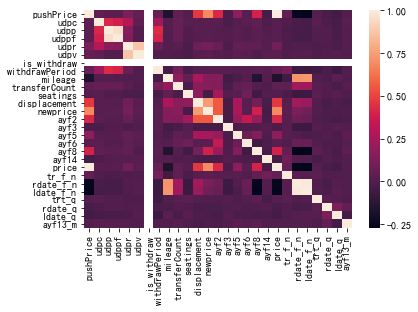

In [20]:
# 相关性矩阵
corr = data.loc[data['is_withdraw']==1].corr()
sns.heatmap(corr, 
            xticklabels=[my_dict[i] if i in my_dict else i for i in corr.columns.values],
            yticklabels=[my_dict[i] if i in my_dict else i for i in corr.columns.values])

corr

In [21]:
corr.withdrawPeriod

pushPrice                 0.069369
updatePriceCount          0.230906
updatePricePeriod         0.426749
updatePricePeriodFirst    0.400617
updatePriceRange          0.073705
updatePriceVariance       0.001143
is_withdraw                    NaN
withdrawPeriod            1.000000
mileage                  -0.028779
transferCount             0.104020
seatings                 -0.027058
displacement              0.011198
newprice                  0.024577
anonymousFeature2         0.019985
anonymousFeature3         0.022280
anonymousFeature5         0.015066
anonymousFeature6         0.022065
anonymousFeature8         0.030209
anonymousFeature14        0.022455
price                     0.063650
tradeTime_from_now        0.108416
registerDate_from_now    -0.067605
licenseDate_from_now     -0.070190
tradeTime_q              -0.056282
registerDate_q           -0.020181
licenseDate_q            -0.065975
anonymousFeature13_m      0.002594
Name: withdrawPeriod, dtype: float64

## 数值型变量和分类变量

In [22]:
# 数据中分类变量cate_columns， 数值型变量columns_to_normalize
columns_to_normalize = ['pushPrice', 'updatePriceCount', 'updatePricePeriod','updatePricePeriodFirst', 'updatePriceRange', 'updatePriceVariance', 'tradeTime_from_now', 'registerDate_from_now', 'licenseDate_from_now', 'mileage', 'transferCount', 'seatings', 'displacement', 'newprice', 'anonymousFeature2', 'anonymousFeature3', 'anonymousFeature5', 'anonymousFeature6', 'anonymousFeature14', 'anonymousFeature8', 'price', ]
cate_columns = ['brand','tradeTime_q', 'registerDate_q', 'licenseDate_q', 'serial', 'model', 'color', 'cityId', 'carCode','country', 'maketype', 'modelyear', 'gearbox','oiltype', 'anonymousFeature11', 'anonymousFeature12', 'anonymousFeature13_m']

data_columns = []  # 模型预测使用到的所有数据，data_columns

In [23]:
data_columns.extend(columns_to_normalize)
data_columns.extend(cate_columns)
data_columns.append('is_withdraw')
data_columns.append('withdrawPeriod')

## 分类变量编码

In [24]:
from convert_to_num import ConvertToNum
# 将分类变量进行编码，转换为数值
convert_to_num = pickle.load(open('./convert_to_num.pkl', 'rb'))
data[cate_columns] = data[cate_columns].apply(convert_to_num.transform)
data

D:\Users\JS\Anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,pushPrice,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw,withdrawPeriod,brand,serial,...,anonymousFeature12,anonymousFeature14,price,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature13_m
0,3.9800,0,0.0,0.0,0.00,0.0000,1,0.0,38,242,...,9840,1,3.9800,315.0,3033.0,2995.0,131,132,132,139
1,4.5000,0,0.0,0.0,0.00,0.0000,1,31.0,49,527,...,10397,2,4.5000,251.0,1602.0,1528.0,129,130,132,133
2,23.9000,1,23.0,23.0,0.90,0.2025,1,26.0,10,686,...,10736,2,23.0000,290.0,995.0,804.0,129,129,132,131
3,20.5798,0,0.0,0.0,0.00,0.0000,1,3.0,30,558,...,10938,1,20.5798,506.0,4159.0,4070.0,130,130,132,129
4,12.2800,1,21.0,21.0,0.38,0.0361,1,53.0,5,171,...,10221,1,11.9000,245.0,2668.0,2596.0,129,132,132,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22.8800,0,0.0,0.0,0.00,0.0000,0,NaN,5,361,...,10074,2,22.8800,173.0,1025.0,899.0,130,129,130,130
9996,12.3000,0,0.0,0.0,0.00,0.0000,0,NaN,5,171,...,10221,1,12.3000,304.0,2333.0,2180.0,131,130,131,137
9997,15.3800,0,0.0,0.0,0.00,0.0000,0,NaN,10,22,...,9769,1,15.3800,376.0,1390.0,1280.0,131,129,130,129
9998,36.8800,1,5.0,5.0,0.28,0.0196,0,NaN,45,275,...,9902,1,36.6000,222.0,1602.0,1452.0,129,130,131,138


## 解释变量

In [25]:
# data_independent是用于预测的特征值
data_independent = data[columns_to_normalize + cate_columns]
data_independent

,pushPrice,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,mileage,...,cityId,carCode,country,maketype,modelyear,gearbox,oiltype,anonymousFeature11,anonymousFeature12,anonymousFeature13_m
0,3.9800,0,0.0,0.0,0.00,0.0000,315.0,3033.0,2995.0,11.80,...,4,9526,9535,9526,9551,9525,4,9594,9840,139
1,4.5000,0,0.0,0.0,0.00,0.0000,251.0,1602.0,1528.0,3.87,...,5,9524,9530,9524,9541,9572,4,4,10397,133
2,23.9000,1,23.0,23.0,0.90,0.2025,290.0,995.0,804.0,1.64,...,44,9527,9532,9524,9550,9566,4,4,10736,131
3,20.5798,0,0.0,0.0,0.00,0.0000,506.0,4159.0,4070.0,10.45,...,4,9526,9532,9525,9558,9579,4,9594,10938,129
4,12.2800,1,21.0,21.0,0.38,0.0361,245.0,2668.0,2596.0,5.66,...,21,9526,9531,9526,9552,9561,4,9594,10221,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22.8800,0,0.0,0.0,0.00,0.0000,173.0,1025.0,899.0,2.31,...,10,9527,9531,9526,9550,9564,4,9594,10074,130
9996,12.3000,0,0.0,0.0,0.00,0.0000,304.0,2333.0,2180.0,6.50,...,37,9524,9531,9526,9548,9561,4,9594,10221,137
9997,15.3800,0,0.0,0.0,0.00,0.0000,376.0,1390.0,1280.0,5.17,...,8,9524,9532,9526,9541,9579,4,9594,9769,129
9998,36.8800,1,5.0,5.0,0.28,0.0196,222.0,1602.0,1452.0,2.29,...,4,9524,9533,9525,9541,9567,4,4,9902,138


# 预测是否会成交

## 模型训练

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_independent.values,data['is_withdraw'].values,test_size=0.2)

In [27]:
x_std = StandardScaler()  
x_train = x_std.fit_transform(x_train)
x_test = x_std.transform(x_test)

In [28]:
# 使用到的模型
# Multinomial Naive Bayes Classifier    
def adaboost_classifier(train_x, train_y):    
    from sklearn.ensemble import AdaBoostClassifier    
    model = AdaBoostClassifier(n_estimators=50)    
    model.fit(train_x, train_y)    
    return model 


def GaussianNB_classifier(train_x, train_y):    
    from sklearn.naive_bayes import GaussianNB    
    model = GaussianNB()    
    model.fit(train_x, train_y)    
    return model    
    
    
# KNN Classifier    
def knn_classifier(train_x, train_y):    
    from sklearn.neighbors import KNeighborsClassifier    
    model = KNeighborsClassifier()    
    model.fit(train_x, train_y)    
    return model    
    
    
# Logistic Regression Classifier    
def logistic_regression_classifier(train_x, train_y):    
    from sklearn.linear_model import LogisticRegression    
    model = LogisticRegression(penalty='l2')    
    model.fit(train_x, train_y)    
    return model    
    
    
# Random Forest Classifier    
def random_forest_classifier(train_x, train_y):    
    from sklearn.ensemble import RandomForestClassifier    
    model = RandomForestClassifier(n_estimators=8)    
    model.fit(train_x, train_y)    
    return model    
    
    
# Decision Tree Classifier    
def decision_tree_classifier(train_x, train_y):    
    from sklearn import tree    
    model = tree.DecisionTreeClassifier()    
    model.fit(train_x, train_y)    
    return model    
    
    
# GBDT(Gradient Boosting Decision Tree) Classifier    
def gradient_boosting_classifier(train_x, train_y):    
    from sklearn.ensemble import GradientBoostingClassifier    
    model = GradientBoostingClassifier(n_estimators=200)    
    model.fit(train_x, train_y)    
    return model    
    
    
# SVM Classifier    
def svm_classifier(train_x, train_y):    
    from sklearn.svm import SVC    
    model = SVC(kernel='rbf', probability=True)    
    model.fit(train_x, train_y)    
    return model    
    
# SVM Classifier using cross validation    
def svm_cross_validation(train_x, train_y):    
    from sklearn.grid_search import GridSearchCV    
    from sklearn.svm import SVC    
    model = SVC(kernel='rbf', probability=True)    
    param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}    
    grid_search = GridSearchCV(model, param_grid, n_jobs = 1, verbose=1)    
    grid_search.fit(train_x, train_y)    
    best_parameters = grid_search.best_estimator_.get_params()    
    for para, val in list(best_parameters.items()):    
        print(para, val)    
    model = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)    
    model.fit(train_x, train_y)    
    return model 

## 稳健性检验

In [29]:
# 集成算法
model_metrics_lists = []  # 每次迭代结果存储列表，[迭代结果表1，迭代结果表2,...,迭代结果表n]
model_lists = []  # 迭代过程中模型保存的列表，[(模型1，评价值)，(模型2，评价值)，...(模型n，评价值)]
for i in range(10):  # 十次迭代进行多个机器学习模型运算
    print('正在进行运算迭代：第{}次'.format(i + 1))
    x_train, x_test, y_train, y_test = train_test_split(data_independent.values, data['is_withdraw'].values, test_size=0.2)
    x_std = StandardScaler()
    x_train = x_std.fit_transform(x_train)
    x_test = x_std.transform(x_test)
    model_names = ["AB", 'GNB', 'KNN', 'LR', 'RF', 'DT', 'GBDT', 'SVM']
    model_AB = adaboost_classifier  # 建立AB对象
    model_GNB = GaussianNB_classifier  # 建立GNB对象
    model_KNN = knn_classifier  # 建立KNN模型对象
    model_LR = logistic_regression_classifier  # 建立LR模型对象
    model_RF = random_forest_classifier  # 建立RF模型对象
    model_DT = decision_tree_classifier  # 这里使用DT
    model_GBDT = gradient_boosting_classifier  # 这里使用GBDT
    model_SVM = svm_classifier  # 这里使用SVM
    model_list = [model_AB, model_GNB, model_KNN, model_LR, model_RF, model_DT, model_GBDT, model_SVM]  # 不同回归模型对象的集合
    model_ls = [model(x_train, y_train) for model in model_list]
    pre_y_list = [model.predict(x_test) for model in model_ls]

    n_samples, n_features = data_independent.shape  # 总样本量，总特征数
    model_metrics_functions = [roc_auc_score, precision_score, recall_score, f1_score]  # 回归评估指标对象之集
    model_metrics_list = [[m(y_test.reshape(-1, 1), pre_y_list[i].reshape(-1, 1)) for m in model_metrics_functions] for
                          i in range(len(pre_y_list))]  # 回归评估指标列表
    model_metrics_lists.append(np.array(model_metrics_list))
    regression_score = pd.DataFrame(model_metrics_list, index=model_names, columns=['roc_auc_score', 'precision_score', 'recall_score', 'f1_score'])
    model_lists.append((model_ls, regression_score['f1_score'].values.tolist()))

正在进行运算迭代：第1次
正在进行运算迭代：第2次
正在进行运算迭代：第3次
正在进行运算迭代：第4次
正在进行运算迭代：第5次
正在进行运算迭代：第6次
正在进行运算迭代：第7次
正在进行运算迭代：第8次
正在进行运算迭代：第9次
正在进行运算迭代：第10次


In [30]:
# 10次运算的平均值
model_metrics_list = sum(model_metrics_lists)/10
regression_score = pd.DataFrame(model_metrics_list, index=model_names, columns=['roc_auc_score', 'precision_score', 'recall_score', 'f1_score']) #建立回归指标的数据框
print('all samples: %d \t features: %d' % (n_samples, n_features), '\n', '-'*60)
print('\n', 'regression metrics:', '\n', '-'*60)
print(regression_score)
print('='*100)

all samples: 10000 	 features: 38 
 ------------------------------------------------------------

 regression metrics: 
 ------------------------------------------------------------
      roc_auc_score  precision_score  recall_score  f1_score
AB         0.644422         0.850173      0.996821  0.917665
GNB        0.580442         0.885522      0.341188  0.482943
KNN        0.541503         0.815446      0.945670  0.875716
LR         0.559735         0.820866      0.990008  0.897526
RF         0.655587         0.857629      0.940530  0.897153
DT         0.644833         0.859931      0.844526  0.852112
GBDT       0.647048         0.851235      0.994504  0.917301
SVM        0.564706         0.822361      0.998937  0.902074


## 最佳模型选择

In [31]:
for idx, i in enumerate(model_lists):
    print("model_{}:{}".format(idx, i[1]))

model_0:[0.9175997703129486, 0.5592133390337751, 0.8781476121562952, 0.8966685488424618, 0.8973293768545993, 0.852294154619736, 0.9184845005740528, 0.9021156558533145]
model_1:[0.915028901734104, 0.47276084949215147, 0.8691615897882216, 0.893110292032889, 0.8963869811884145, 0.8498565508447561, 0.9124637681159419, 0.8970005659309565]
model_2:[0.9240470048724564, 0.45719574271170754, 0.8784018529241459, 0.9051918735891649, 0.9096296296296297, 0.8566061365059487, 0.9245337159253947, 0.9118061425753733]
model_3:[0.9132314788123378, 0.5342768686421937, 0.8739495798319328, 0.8938103350369109, 0.8969226172691962, 0.843620083146786, 0.9124530482519504, 0.8973125884016974]
model_4:[0.9181556195965417, 0.44433962264150945, 0.8799076212471131, 0.8927355278093075, 0.8970456580125334, 0.847275031685678, 0.9165945165945167, 0.8997458345100255]
model_5:[0.9169757489300999, 0.432104526364909, 0.8733850129198967, 0.90014064697609, 0.8992932862190812, 0.8530421216848674, 0.9174049728493854, 0.902125279

In [32]:
best_model = model_lists[2][0][-2]
best_model

GradientBoostingClassifier(n_estimators=200)

## 特征重要性

In [33]:
# 特征重要性
# Get numerical feature importances
importances = list(best_model.feature_importances_)
 
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data_independent.columns, importances)]
 
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: model                Importance: 0.6
Variable: price                Importance: 0.05
Variable: tradeTime_from_now   Importance: 0.04
Variable: cityId               Importance: 0.04
Variable: mileage              Importance: 0.03
Variable: transferCount        Importance: 0.03
Variable: anonymousFeature12   Importance: 0.03
Variable: displacement         Importance: 0.02
Variable: pushPrice            Importance: 0.01
Variable: updatePricePeriod    Importance: 0.01
Variable: updatePriceRange     Importance: 0.01
Variable: updatePriceVariance  Importance: 0.01
Variable: registerDate_from_now Importance: 0.01
Variable: licenseDate_from_now Importance: 0.01
Variable: newprice             Importance: 0.01
Variable: anonymousFeature2    Importance: 0.01
Variable: anonymousFeature5    Importance: 0.01
Variable: serial               Importance: 0.01
Variable: color                Importance: 0.01
Variable: carCode              Importance: 0.01
Variable: modelyear            Importanc

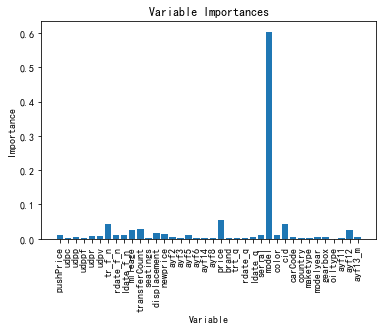

In [34]:
# list of x locations for plotting
x_values = list(range(len(importances)))
 
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
 
# Tick labels for x axis
plt.xticks(x_values, [my_dict[i] if i in my_dict else i for i in data_columns], rotation='vertical')
 
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

## 模型保存

In [ ]:
pickle.dump(best_model, open('./model/model_GBDT_best.pkl', 'wb'))

## 分析

### 分类变量解码

In [35]:
# 数据读取与逆编码
data3 = data.loc[data['is_withdraw']==1]
data4 = data.loc[data['is_withdraw']==0]
data3

,pushPrice,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw,withdrawPeriod,brand,serial,...,anonymousFeature12,anonymousFeature14,price,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature13_m
0,3.9800,0,0.0,0.0,0.00,0.0000,1,0.0,38,242,...,9840,1,3.9800,315.0,3033.0,2995.0,131,132,132,139
1,4.5000,0,0.0,0.0,0.00,0.0000,1,31.0,49,527,...,10397,2,4.5000,251.0,1602.0,1528.0,129,130,132,133
2,23.9000,1,23.0,23.0,0.90,0.2025,1,26.0,10,686,...,10736,2,23.0000,290.0,995.0,804.0,129,129,132,131
3,20.5798,0,0.0,0.0,0.00,0.0000,1,3.0,30,558,...,10938,1,20.5798,506.0,4159.0,4070.0,130,130,132,129
4,12.2800,1,21.0,21.0,0.38,0.0361,1,53.0,5,171,...,10221,1,11.9000,245.0,2668.0,2596.0,129,132,132,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,11.3800,1,13.0,13.0,0.38,0.0361,1,13.0,12,66,...,9637,1,11.0000,222.0,1360.0,1304.0,129,129,129,132
7996,9.6800,1,2.0,2.0,0.30,0.0225,1,218.0,5,5,...,9599,2,9.3800,646.0,1786.0,1749.0,129,131,129,133
7997,4.0000,1,2.0,2.0,0.20,0.0100,1,10.0,10,164,...,9974,2,3.8000,527.0,3275.0,3235.0,130,131,131,137
7998,4.8800,0,0.0,0.0,0.00,0.0000,1,4.0,37,720,...,10825,1,4.8800,468.0,2576.0,2542.0,132,131,131,140


In [36]:
from convert_to_num import ConvertToNum
data3[cate_columns].apply(convert_to_num.inverse_transform)
data4[cate_columns].apply(convert_to_num.inverse_transform)
data3

,pushPrice,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw,withdrawPeriod,brand,serial,...,anonymousFeature12,anonymousFeature14,price,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature13_m
0,3.9800,0,0.0,0.0,0.00,0.0000,1,0.0,38,242,...,9840,1,3.9800,315.0,3033.0,2995.0,131,132,132,139
1,4.5000,0,0.0,0.0,0.00,0.0000,1,31.0,49,527,...,10397,2,4.5000,251.0,1602.0,1528.0,129,130,132,133
2,23.9000,1,23.0,23.0,0.90,0.2025,1,26.0,10,686,...,10736,2,23.0000,290.0,995.0,804.0,129,129,132,131
3,20.5798,0,0.0,0.0,0.00,0.0000,1,3.0,30,558,...,10938,1,20.5798,506.0,4159.0,4070.0,130,130,132,129
4,12.2800,1,21.0,21.0,0.38,0.0361,1,53.0,5,171,...,10221,1,11.9000,245.0,2668.0,2596.0,129,132,132,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,11.3800,1,13.0,13.0,0.38,0.0361,1,13.0,12,66,...,9637,1,11.0000,222.0,1360.0,1304.0,129,129,129,132
7996,9.6800,1,2.0,2.0,0.30,0.0225,1,218.0,5,5,...,9599,2,9.3800,646.0,1786.0,1749.0,129,131,129,133
7997,4.0000,1,2.0,2.0,0.20,0.0100,1,10.0,10,164,...,9974,2,3.8000,527.0,3275.0,3235.0,130,131,131,137
7998,4.8800,0,0.0,0.0,0.00,0.0000,1,4.0,37,720,...,10825,1,4.8800,468.0,2576.0,2542.0,132,131,131,140


### 哪些车型更受青睐

In [37]:
# 每种车型的成交比率
data5 = df[['model', 'is_withdraw', 'carid']].groupby('model').agg({
      'is_withdraw' : 'sum',
      'carid' : 'count'
})
data5

,is_withdraw,carid
model,,
1,3,3
10,2,2
100,1,1
10004,1,1
1001,4,4
...,...,...
9985,0,2
999,3,4
9990,1,1


In [38]:
# 每种车型的成交比率
data5['withdrawRate'] = np.round(data5['is_withdraw']/data5['carid'], 2)
data5

,is_withdraw,carid,withdrawRate
model,,,
1,3,3,1.00
10,2,2,1.00
100,1,1,1.00
10004,1,1,1.00
1001,4,4,1.00
...,...,...,...
9985,0,2,0.00
999,3,4,0.75
9990,1,1,1.00


In [39]:
data5 = data5.sort_values(["carid", "withdrawRate"], ascending=False)
data5

,is_withdraw,carid,withdrawRate
model,,,
6717,34,36,0.94
34,32,35,0.91
306,24,34,0.71
844,22,26,0.85
338,16,22,0.73
...,...,...,...
9905,0,1,0.00
9927,0,1,0.00
9941,0,1,0.00


In [40]:
data5 = data5.reset_index()
data5

,model,is_withdraw,carid,withdrawRate
0,6717,34,36,0.94
1,34,32,35,0.91
2,306,24,34,0.71
3,844,22,26,0.85
4,338,16,22,0.73
...,...,...,...,...
5010,9905,0,1,0.00
5011,9927,0,1,0.00
5012,9941,0,1,0.00
5013,9948,0,1,0.00


In [41]:
data6 = data5.iloc[:100]
data6

,model,is_withdraw,carid,withdrawRate
0,6717,34,36,0.94
1,34,32,35,0.91
2,306,24,34,0.71
3,844,22,26,0.85
4,338,16,22,0.73
...,...,...,...,...
95,223,7,8,0.88
96,321,7,8,0.88
97,3503,7,8,0.88
98,6538,7,8,0.88


In [42]:
c = (
    Scatter() #创建散点图对象
    .add_xaxis(data6.carid)#添加x周数据（薪资）
    .add_yaxis(
        "二手车库存数量与成交比率", #y轴数据说明
        [list(z) for z in zip( data6.withdrawRate, data6.model)],#Y轴数据，岗位，城市
        label_opts=opts.LabelOpts(#Js代码控制气泡显示提示文字
            formatter=JsCode(
                "function(params){return 'model：'+params.value[2]}" #提示
            )
        ),
    )
    .set_global_opts(#全局变量
        title_opts=opts.TitleOpts(title="二手车库存数量与成交比率"),#设置标题
        tooltip_opts=opts.TooltipOpts(#Js代码控制气泡弹窗提示文字
            formatter=JsCode(
                "function (params) {return '成交比率：'+params.value[1]+ ' ' +'二手车库存总量：'+params.value[0]}"
            )
        ),
        visualmap_opts=opts.VisualMapOpts(#控制
            type_="size", max_=1, min_=0, dimension=1
        ),
        xaxis_opts=opts.AxisOpts(name='库存总量'),#设置X轴起始值，X轴名字
        yaxis_opts=opts.AxisOpts(min_=0,max_=1,name='成交比率'),#设置Y轴起始值，Y轴名字
    )
)
c.render_notebook()


# 预测成交周期

## 解释变量

In [43]:
# data_independent2是用于预测的特征值
data_independent2 = data.loc[data.is_withdraw==1][columns_to_normalize + cate_columns]
data_independent2

,pushPrice,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,mileage,...,cityId,carCode,country,maketype,modelyear,gearbox,oiltype,anonymousFeature11,anonymousFeature12,anonymousFeature13_m
0,3.9800,0,0.0,0.0,0.00,0.0000,315.0,3033.0,2995.0,11.80,...,4,9526,9535,9526,9551,9525,4,9594,9840,139
1,4.5000,0,0.0,0.0,0.00,0.0000,251.0,1602.0,1528.0,3.87,...,5,9524,9530,9524,9541,9572,4,4,10397,133
2,23.9000,1,23.0,23.0,0.90,0.2025,290.0,995.0,804.0,1.64,...,44,9527,9532,9524,9550,9566,4,4,10736,131
3,20.5798,0,0.0,0.0,0.00,0.0000,506.0,4159.0,4070.0,10.45,...,4,9526,9532,9525,9558,9579,4,9594,10938,129
4,12.2800,1,21.0,21.0,0.38,0.0361,245.0,2668.0,2596.0,5.66,...,21,9526,9531,9526,9552,9561,4,9594,10221,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,11.3800,1,13.0,13.0,0.38,0.0361,222.0,1360.0,1304.0,6.22,...,5,9524,9531,9526,9543,9561,4,9594,9637,132
7996,9.6800,1,2.0,2.0,0.30,0.0225,646.0,1786.0,1749.0,2.66,...,122,9524,9531,9526,9541,9526,4,9594,9599,133
7997,4.0000,1,2.0,2.0,0.20,0.0100,527.0,3275.0,3235.0,8.09,...,21,9526,9532,9526,9552,9529,4,4,9974,137
7998,4.8800,0,0.0,0.0,0.00,0.0000,468.0,2576.0,2542.0,10.52,...,59,9524,9530,9524,9548,9580,4,9594,10825,140


In [44]:
# 选择有成交周期的数据
data2 = data.loc[data.is_withdraw==1]
data2

,pushPrice,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw,withdrawPeriod,brand,serial,...,anonymousFeature12,anonymousFeature14,price,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature13_m
0,3.9800,0,0.0,0.0,0.00,0.0000,1,0.0,38,242,...,9840,1,3.9800,315.0,3033.0,2995.0,131,132,132,139
1,4.5000,0,0.0,0.0,0.00,0.0000,1,31.0,49,527,...,10397,2,4.5000,251.0,1602.0,1528.0,129,130,132,133
2,23.9000,1,23.0,23.0,0.90,0.2025,1,26.0,10,686,...,10736,2,23.0000,290.0,995.0,804.0,129,129,132,131
3,20.5798,0,0.0,0.0,0.00,0.0000,1,3.0,30,558,...,10938,1,20.5798,506.0,4159.0,4070.0,130,130,132,129
4,12.2800,1,21.0,21.0,0.38,0.0361,1,53.0,5,171,...,10221,1,11.9000,245.0,2668.0,2596.0,129,132,132,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,11.3800,1,13.0,13.0,0.38,0.0361,1,13.0,12,66,...,9637,1,11.0000,222.0,1360.0,1304.0,129,129,129,132
7996,9.6800,1,2.0,2.0,0.30,0.0225,1,218.0,5,5,...,9599,2,9.3800,646.0,1786.0,1749.0,129,131,129,133
7997,4.0000,1,2.0,2.0,0.20,0.0100,1,10.0,10,164,...,9974,2,3.8000,527.0,3275.0,3235.0,130,131,131,137
7998,4.8800,0,0.0,0.0,0.00,0.0000,1,4.0,37,720,...,10825,1,4.8800,468.0,2576.0,2542.0,132,131,131,140


## 集成算法模型训练

In [45]:
# 集成算法
model_metrics_lists = []  # 每次迭代结果存储列表，[迭代结果表1，迭代结果表2,...,迭代结果表n]
model_lists = []  # 迭代过程中模型保存的列表，[(模型1，评价值)，(模型2，评价值)，...(模型n，评价值)]
for i in range(10):  # 十次迭代进行多个机器学习模型运算
    print('正在进行运算迭代：第{}次'.format(i + 1))
    x_train, x_test, y_train, y_test = train_test_split(data_independent2.values, data2['withdrawPeriod'].values, test_size=0.2)
    x_std = StandardScaler()
    x_train = x_std.fit_transform(x_train)
    x_test = x_std.transform(x_test)
    y_std = StandardScaler()
    y_train = y_std.fit_transform(y_train.reshape(-1, 1))
    y_test = y_std.transform(y_test.reshape(-1, 1))
    model_names = ['BayesianRidge', 'XGBR', 'ElasticNet', 'SVR', 'GBR', 'RFR', 'ABR', 'BR', 'KNN']
    model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
    model_xgbr = XGBRegressor(random_state=0)  # 建立XGBR对象
    model_etc = ElasticNet(random_state=0)  # 建立弹性网络回归模型对象
    model_svr = SVR(gamma='auto')  # 建立支持向量机回归模型对象
    model_gbr = GradientBoostingRegressor(random_state=0)  # 建立梯度增强回归模型对象
    model_rfr = RandomForestRegressor(n_estimators=50)  # 这里使用20个决策树
    model_abr = AdaBoostRegressor(n_estimators=50)  # 这里使用20个决策树
    model_br2 = BaggingRegressor(n_estimators=50)  # 这里使用20个决策树
    model_knn = KNeighborsRegressor()  # 这里使用knn
    model_list = [model_br, model_xgbr, model_etc, model_svr, model_gbr, model_rfr, model_abr, model_br2, model_knn]  # 不同回归模型对象的集合
    pre_y_list = [model.fit(x_train, y_train).predict(x_test) for model in model_list]  # 各个回归模型预测的y值列表
    n_samples, n_features = data_independent.shape  # 总样本量，总特征数
    model_metrics_functions = [mean_absolute_error, r2_score]  # 回归评估指标对象之集
    model_metrics_list = [[np.around(
        m(y_std.inverse_transform(y_test.reshape(-1, 1)), y_std.inverse_transform(pre_y_list[i].reshape(-1, 1))), 2) for
                           m in model_metrics_functions] for i in range(len(pre_y_list))]  # 回归评估指标列表
    model_metrics_lists.append(np.array(model_metrics_list))
    regression_score = pd.DataFrame(model_metrics_list, index=model_names, columns=['mae', 'r2'])
    model_lists.append((model_list, regression_score['mae'].values.tolist()))

正在进行运算迭代：第1次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

正在进行运算迭代：第2次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

正在进行运算迭代：第3次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

正在进行运算迭代：第4次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

正在进行运算迭代：第5次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

正在进行运算迭代：第6次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

正在进行运算迭代：第7次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

正在进行运算迭代：第8次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

正在进行运算迭代：第9次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

正在进行运算迭代：第10次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

In [46]:
# 10次运算的平均值
model_metrics_list = sum(model_metrics_lists)/10
regression_score = pd.DataFrame(model_metrics_list, index=model_names, columns=['mae', 'r2']) #建立回归指标的数据框
print('all samples: %d \t features: %d' % (n_samples, n_features), '\n', '-'*60)
print('\n', 'regression metrics:', '\n', '-'*60)
print(regression_score)
print('='*100)

all samples: 10000 	 features: 38 
 ------------------------------------------------------------

 regression metrics: 
 ------------------------------------------------------------
                  mae     r2
BayesianRidge  14.971  0.214
XGBR           14.072  0.309
ElasticNet     17.815  0.000
SVR            12.978  0.214
GBR            13.379  0.344
RFR            14.082  0.329
ABR            33.263 -0.973
BR             14.044  0.331
KNN            15.790  0.099


## 模型选择

In [47]:
for idx, i in enumerate(model_lists):
    print("model_{}:{}".format(idx, i[1]))

model_0:[14.65, 13.86, 17.46, 12.95, 13.3, 13.88, 19.13, 13.88, 15.83]
model_1:[15.09, 14.06, 17.71, 13.13, 13.27, 14.42, 29.41, 14.09, 16.2]
model_2:[14.93, 14.04, 17.36, 13.0, 13.43, 14.26, 29.59, 14.32, 15.57]
model_3:[15.26, 14.05, 18.12, 13.05, 13.52, 14.1, 34.77, 14.39, 15.96]
model_4:[14.97, 14.27, 17.76, 12.7, 13.69, 14.04, 37.23, 14.09, 15.27]
model_5:[15.25, 14.05, 18.07, 13.32, 13.6, 13.89, 37.31, 13.89, 16.06]
model_6:[15.25, 14.21, 18.34, 13.46, 13.6, 14.18, 36.22, 14.13, 16.04]
model_7:[14.91, 14.23, 17.6, 12.71, 13.26, 14.03, 29.59, 14.0, 15.89]
model_8:[14.52, 13.69, 17.62, 12.29, 12.83, 13.66, 37.12, 13.7, 15.05]
model_9:[14.88, 14.26, 18.11, 13.17, 13.29, 14.36, 42.26, 13.95, 16.03]


In [48]:
best_model = model_lists[8][0][4]
best_model

GradientBoostingRegressor(random_state=0)

## 特征重要性

In [49]:
# 特征重要性
# Get numerical feature importances
importances = list(best_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data_independent.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: updatePricePeriod    Importance: 0.42
Variable: cityId               Importance: 0.17
Variable: tradeTime_from_now   Importance: 0.11
Variable: updatePriceCount     Importance: 0.07
Variable: updatePricePeriodFirst Importance: 0.03
Variable: price                Importance: 0.03
Variable: mileage              Importance: 0.02
Variable: transferCount        Importance: 0.02
Variable: newprice             Importance: 0.02
Variable: anonymousFeature5    Importance: 0.02
Variable: model                Importance: 0.02
Variable: pushPrice            Importance: 0.01
Variable: licenseDate_from_now Importance: 0.01
Variable: displacement         Importance: 0.01
Variable: modelyear            Importance: 0.01
Variable: anonymousFeature12   Importance: 0.01
Variable: updatePriceRange     Importance: 0.0
Variable: updatePriceVariance  Importance: 0.0
Variable: registerDate_from_now Importance: 0.0
Variable: seatings             Importance: 0.0
Variable: anonymousFeature2    Importance

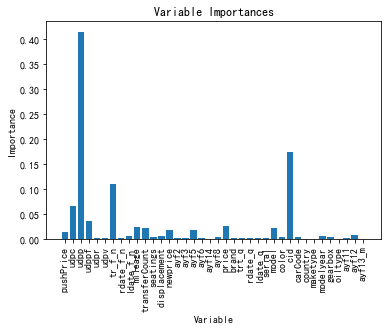

In [50]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, [my_dict[i] if i in my_dict else i for i in data_columns], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

## 模型保存

In [51]:
pickle.dump(best_model, open('./model/model_GBR_best.pkl', 'wb'))

## 分析

### 模型加载

In [52]:
best_model = pickle.load(open('./model/model_GBR_best.pkl', 'rb'))

### 数据等级划分

In [53]:
def func(line):
    updatePricePeriod = line['updatePricePeriod']
    if updatePricePeriod <= 3:
        line['rank'] = 1
    elif updatePricePeriod <= 7:
        line['rank'] = 2
    elif updatePricePeriod <= 13:
        line['rank'] = 3
    else:
        line['rank'] = 4
    return line
data2 = data2.apply(func, axis=1)
data2

,pushPrice,updatePriceCount,updatePricePeriod,updatePricePeriodFirst,updatePriceRange,updatePriceVariance,is_withdraw,withdrawPeriod,brand,serial,...,anonymousFeature14,price,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature13_m,rank
0,3.9800,0.0,0.0,0.0,0.00,0.0000,1.0,0.0,38.0,242.0,...,1.0,3.9800,315.0,3033.0,2995.0,131.0,132.0,132.0,139.0,1.0
1,4.5000,0.0,0.0,0.0,0.00,0.0000,1.0,31.0,49.0,527.0,...,2.0,4.5000,251.0,1602.0,1528.0,129.0,130.0,132.0,133.0,1.0
2,23.9000,1.0,23.0,23.0,0.90,0.2025,1.0,26.0,10.0,686.0,...,2.0,23.0000,290.0,995.0,804.0,129.0,129.0,132.0,131.0,4.0
3,20.5798,0.0,0.0,0.0,0.00,0.0000,1.0,3.0,30.0,558.0,...,1.0,20.5798,506.0,4159.0,4070.0,130.0,130.0,132.0,129.0,1.0
4,12.2800,1.0,21.0,21.0,0.38,0.0361,1.0,53.0,5.0,171.0,...,1.0,11.9000,245.0,2668.0,2596.0,129.0,132.0,132.0,134.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,11.3800,1.0,13.0,13.0,0.38,0.0361,1.0,13.0,12.0,66.0,...,1.0,11.0000,222.0,1360.0,1304.0,129.0,129.0,129.0,132.0,3.0
7996,9.6800,1.0,2.0,2.0,0.30,0.0225,1.0,218.0,5.0,5.0,...,2.0,9.3800,646.0,1786.0,1749.0,129.0,131.0,129.0,133.0,1.0
7997,4.0000,1.0,2.0,2.0,0.20,0.0100,1.0,10.0,10.0,164.0,...,2.0,3.8000,527.0,3275.0,3235.0,130.0,131.0,131.0,137.0,1.0
7998,4.8800,0.0,0.0,0.0,0.00,0.0000,1.0,4.0,37.0,720.0,...,1.0,4.8800,468.0,2576.0,2542.0,132.0,131.0,131.0,140.0,1.0


## 方差分析

In [54]:
# 四分位点
data2[data2.updatePricePeriod>0][['updatePricePeriod']].describe()

,updatePricePeriod
count,2696.000000
mean,10.371574
std,12.191468
min,1.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,143.000000


In [55]:
# 方差分析
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

model = ols('withdrawPeriod ~C(rank)', data = data2[['rank','withdrawPeriod']]).fit()
anova_table = anova_lm(model, type = 3)
pd.DataFrame(anova_table)

D:\Users\JS\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


,df,sum_sq,mean_sq,F,PR(>F)
C(rank),3.0,9.405197e+05,313506.571125,510.444099,1.639972e-303
Residual,7996.0,4.911015e+06,614.183946,NaN,NaN


In [56]:
# 进行事后比较分析
print(pairwise_tukeyhsd(data2['withdrawPeriod'], data2['rank']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 1.0    2.0    3.3003   0.799   5.8016  True 
 1.0    3.0   12.1751   9.4004 14.9498  True 
 1.0    4.0   39.1853  36.5585  41.812  True 
 2.0    3.0    8.8748   5.3232 12.4264  True 
 2.0    4.0    35.885  32.4477 39.3223  True 
 3.0    4.0   27.0101  23.3691 30.6512  True 
---------------------------------------------


## 查看各个组均值

In [57]:
data2[data2['rank'] == 1]['withdrawPeriod'].mean()

17.168044988422096

In [58]:
data2[data2['rank'] == 2]['withdrawPeriod'].mean()

20.46831955922865

In [59]:
data2[data2['rank'] == 3]['withdrawPeriod'].mean()

29.34315424610052

In [60]:
data2[data2['rank'] == 4]['withdrawPeriod'].mean()

56.35330261136713